In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.Class.value_counts()/df.shape[0]

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [6]:
print df.Time.min(), df.Time.max()

0.0 172792.0


In [7]:
df["Hour"] = ((df.Time / 3600)).astype("int")
df["Day"] = (df["Hour"] / 24).astype("int")

In [8]:
df["HourNew"] = df["Hour"] % 24

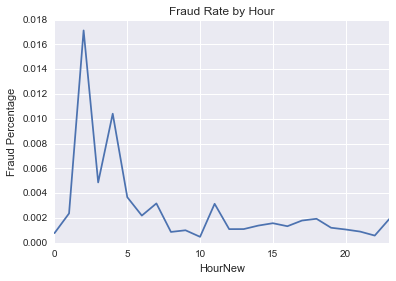

In [9]:
hourly_fraud = df.groupby("HourNew")["Class"].sum() /df.groupby("HourNew")["Class"].count()
hourly_fraud.plot()
plt.title("Fraud Rate by Hour")
plt.ylabel("Fraud Percentage")

Fraud is relatively high between 2am and 7am on both days

In [10]:
df["HighRiskHour"] = 0
df.loc[(df["HourNew"] > 2) & (df["HourNew"] <=7),"HighRiskHour"] = 1

In [11]:
df["HighRiskHour"].value_counts()

0    264772
1     20035
Name: HighRiskHour, dtype: int64

In [12]:
df.groupby("HighRiskHour")["Class"].sum() / df.groupby("HighRiskHour")["Class"].count()

HighRiskHour
0    0.001545
1    0.004143
Name: Class, dtype: float64

The transactions between 2am to 7am are almost 3 times more riskier than the transactions at other times

In [13]:
fraud = df.loc[df["Class"]==1]

In [14]:
df["AmtStr"] = df["Amount"].astype(str)

In [15]:
df["Amt1stChar"] = df["AmtStr"].apply(lambda x: x[0])

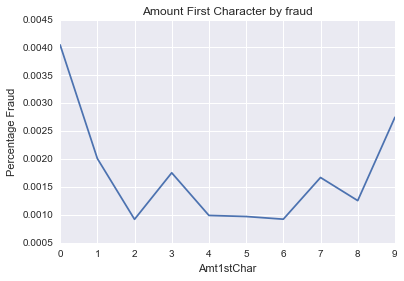

In [16]:
Amt1stChar = df.groupby("Amt1stChar")["Class"].sum()/df.groupby("Amt1stChar")["Class"].count()
Amt1stChar.plot()
plt.title("Amount First Character by fraud")
plt.ylabel("Percentage Fraud")

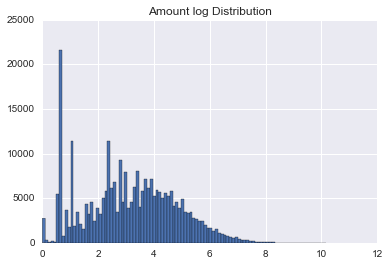

In [17]:
plt.hist(np.log(df["Amount"]+1), bins=100)
plt.title("Amount log Distribution")

In [18]:
df.describe(percentiles=[.25,.50,.75, 0.9, 0.95, 0.97, 0.99,1])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,Day,HourNew,HighRiskHour
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727,25.845703,0.491635,14.046470,0.070346
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,13.184831,0.499931,5.835854,0.255729
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,15.000000,0.000000,10.000000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,23.000000,0.000000,15.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,38.000000,1.000000,19.000000,0.000000
90%,157640.400000,2.015409e+00,1.326635e+00,1.676173e+00,1.482807e+00,1.407893e+00,1.509365e+00,1.039387e+00,7.693811e-01,1.301671e+00,1.119759e+00,1.318588e+00,1.017274e+00,1.251841e+00,9.814085e-01,1.124211e+00,9.908792e-01,9.086165e-01,1.020455e+00,9.538328e-01,4.445929e-01,3.761555e-01,9.148826e-01,3.392860e-01,7.054036e-01,6.009027e-01,6.889469e-01,2.653679e-01,1.799362e-01,203.000000,0.000000,43.000000,1.000000,21.000000,0.000000
95%,164143.400000,2.081223e+00,1.808585e+00,2.062635e+00,2.566501e+00,2.098960e+00,3.160382e+00,1.407632e+00,1.049984e+00,1.780783e+00,1.548557e+00,1.614033e+00,1.243053e+00,1.607877e+00,1.393653e+00,1.373090e+00,1.325253e+00,1.274609e+00,1

In [19]:
df["AmtCap"] = df["Amount"]
df.loc[df["Amount"] > np.percentile(df["Amount"], 99), "AmtCap"] = 1017.97

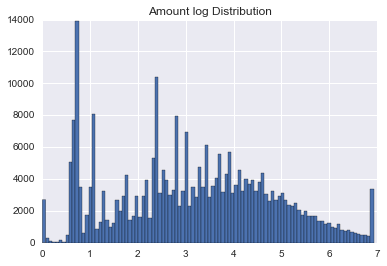

In [20]:
plt.hist(np.log(df["AmtCap"]+1), bins=100)
plt.title("Amount log Distribution")

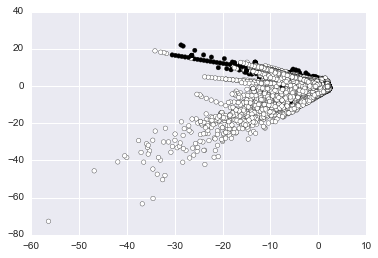

In [21]:
plt.scatter(x=df["V1"], y=df["V2"], c=df["Class"] )

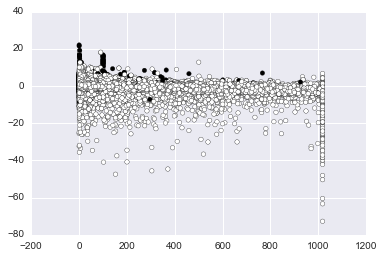

In [148]:
plt.scatter(x=df["AmtCap"], y=df["V2"],c=df["Class"] )

In [150]:
df["LogAmt"] = np.log(df["AmtCap"] + 1)
df1 = df.drop(["Amount", "Hour", "Day", "AmtStr","Time", "AmtCap"], axis=1)

In [151]:
df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,HourNew,HighRiskHour,Amt1stChar,LogAmt
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0,0,1,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0,0,2,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0,0,3,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0,0,1,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0,0,6,4.262539


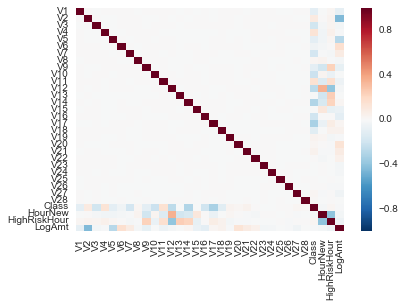

In [152]:
sns.heatmap(df1.corr())

In [25]:
#from pandas.tools.plotting import scatter_matrix
#scatter_matrix(df1, diagonal= 'kde')

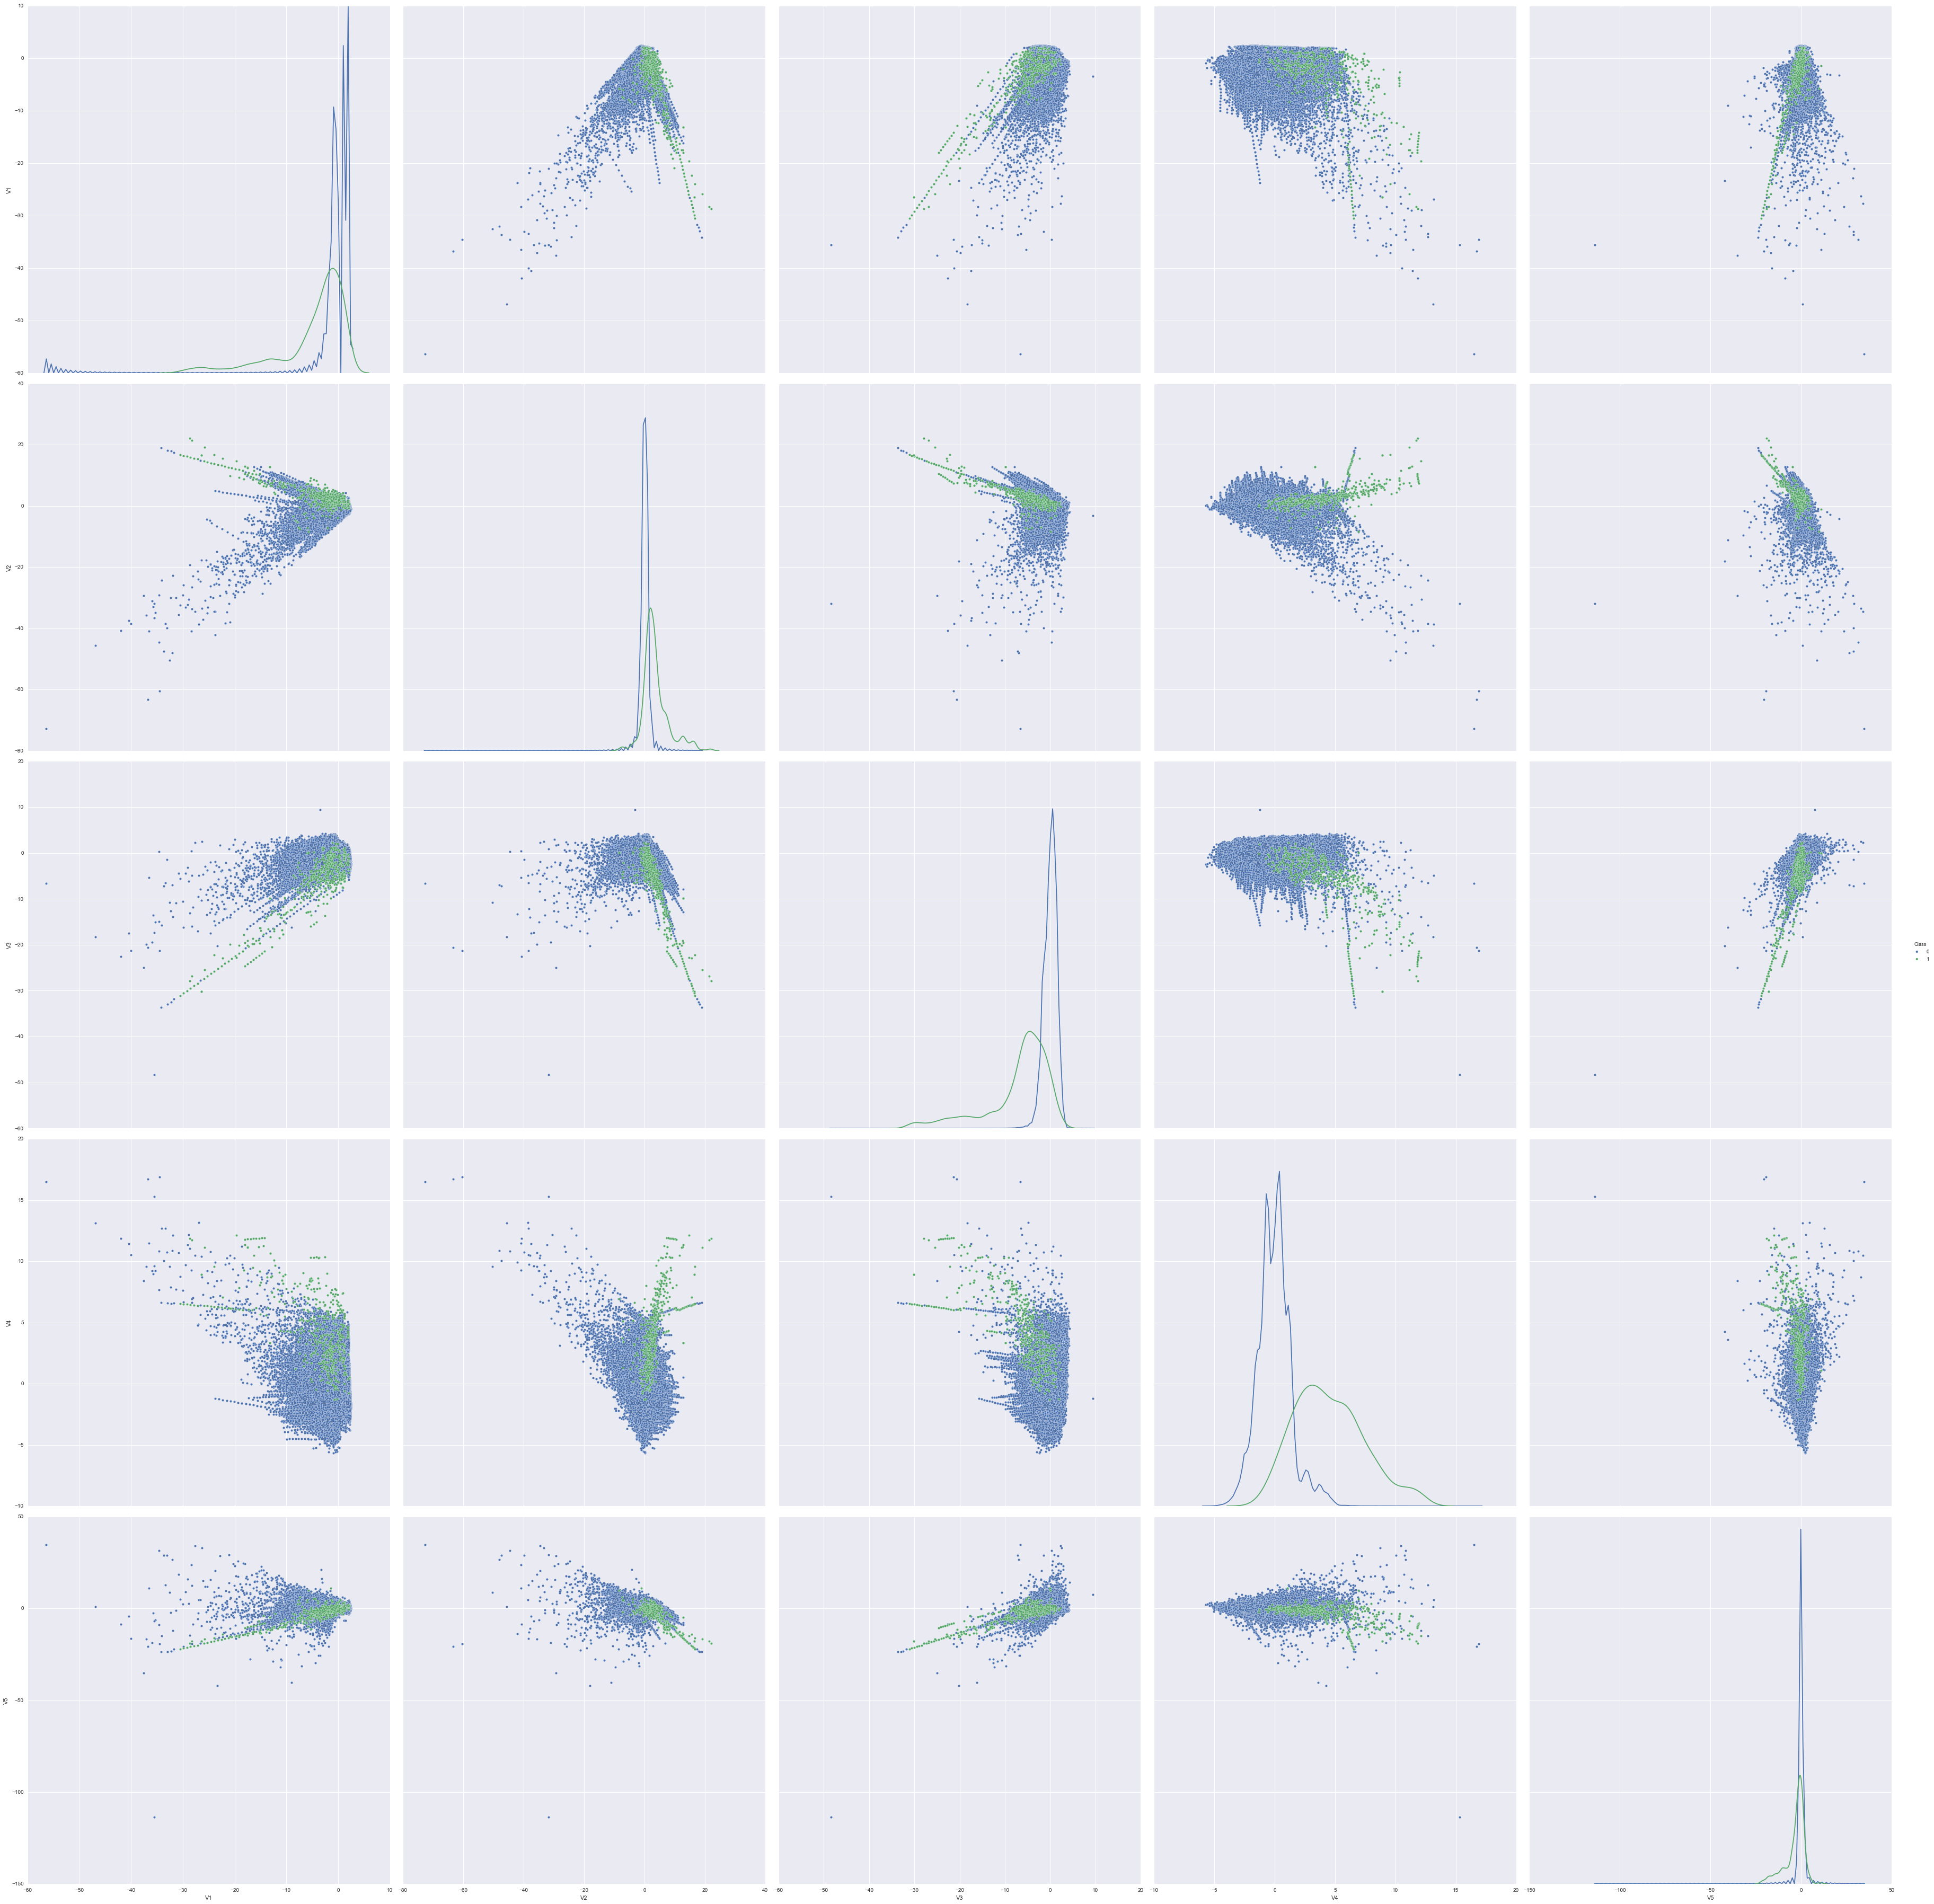

In [30]:
sns.pairplot(df1, x_vars=['V1', 'V2', 'V3', 'V4', 'V5'], y_vars=['V1', 'V2', 'V3', 'V4', 'V5'], 
             hue = 'Class', size=10, diag_kind='kde')

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, auc,classification_report,confusion_matrix,r2_score, mean_squared_error

In [154]:
X= pd.concat([df1.iloc[:,0:28],df1.iloc[:,29:]],axis=1)
y = df["Class"]
X.columns

Index([u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9', u'V10',
       u'V11', u'V12', u'V13', u'V14', u'V15', u'V16', u'V17', u'V18', u'V19',
       u'V20', u'V21', u'V22', u'V23', u'V24', u'V25', u'V26', u'V27', u'V28',
       u'HourNew', u'HighRiskHour', u'Amt1stChar', u'LogAmt'],
      dtype='object')

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [156]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [157]:
confusion_matrix(y_test, pred)

array([[56859,     9],
       [   30,    64]])

In [158]:
from sklearn.linear_model import Ridge, Lasso
alpha= np.logspace(start=-10, stop=10, num=21)
error_dict={}
for a in alpha:
    dict = {}
    dict['alpha']=a
    ridge_lm=Ridge(alpha=a, normalize=True)
    ridge_model = ridge_lm.fit(X_train, y_train)
    ridge_predictions = ridge_model.predict(X_test)
    ridge_R2=ridge_model.score(X_test, y_test) 
    ridge_MSE= mean_squared_error(y_test, ridge_predictions)   
    print ' -----'
    print 'Ridge'
    print 'alpha:', a
    print "r^2:", ridge_R2
    print 'MSE: ', ridge_MSE
    print 'alpha:', a
    print 'Linear Regression Coefficients:', ridge_lm.coef_
    print ' -----'    
    print '\n'
    lasso_lm=Lasso(alpha=a,normalize=True)
    lasso_model = lasso_lm.fit(X_train, y_train)
    lasso_predictions = lasso_model.predict(X_test)
    lasso_R2=lasso_model.score(X_test, y_test) 
    lasso_MSE= mean_squared_error(y_test, lasso_predictions)
    print '----'
    print 'Lasso'
    print 'alpha:', a
    print "r^2:", lasso_R2
    print 'MSE: ',lasso_MSE
    print 'Linear Regression Coefficients:', lasso_lm.coef_
    print ' -----'  
    print '\n'
    error_dict[a] = [ridge_R2,ridge_MSE,lasso_R2,lasso_MSE]
out_df=pd.DataFrame(error_dict,index=['Ridge_R2','Ridge_MSE','Lasso_R2','Lasso_MSE']).transpose()
out_df

 -----
Ridge
alpha: 1e-10
r^2: 0.553402115804
MSE:  0.000735769889099
alpha: 1e-10
Linear Regression Coefficients: [ -2.08487164e-03   2.30466661e-03  -5.16977139e-03   3.93136138e-03
  -2.73563643e-03  -1.35346692e-03  -6.11420862e-03   6.67974156e-04
  -3.54894450e-03  -8.21159410e-03   6.35048220e-03  -1.10450296e-02
  -2.41405194e-05  -1.29310309e-02  -2.56631568e-04  -9.22828720e-03
  -1.56920291e-02  -5.42784923e-03   1.68260946e-03   1.04965937e-03
   2.19617378e-03   4.25454777e-05  -1.17617446e-04  -5.42942870e-04
   2.94911478e-04   3.96874062e-04   1.70119220e-03   1.10319178e-03
   3.72314394e-05  -1.67345937e-03  -5.81018212e-05   6.10183810e-05]
 -----


----
Lasso
alpha: 1e-10
r^2: 0.553401693568
MSE:  0.000735770584733
Linear Regression Coefficients: [ -2.08485198e-03   2.30461209e-03  -5.16974522e-03   3.93132423e-03
  -2.73562152e-03  -1.35342208e-03  -6.11416330e-03   6.67932724e-04
  -3.54892962e-03  -8.21154815e-03   6.35041688e-03  -1.10449445e-02
  -2.41170223e-0

,Ridge_R2,Ridge_MSE,Lasso_R2,Lasso_MSE
1.000000e-10,0.553402,0.000736,0.553402,0.000736
1.000000e-09,0.553402,0.000736,0.553398,0.000736
1.000000e-08,0.553402,0.000736,0.553359,0.000736
1.000000e-07,0.553402,0.000736,0.552935,0.000737
1.000000e-06,0.553402,0.000736,0.546352,0.000747
1.000000e-05,0.553402,0.000736,0.356011,0.001061
1.000000e-04,0.553396,0.000736,-0.000006,0.001648
1.000000e-03,0.553345,0.000736,-0.000006,0.001648
1.000000e-02,0.552789,0.000737,-0.000006,0.001648
1.000000e-01,0.544186,0.000751,-0.000006,0.001648


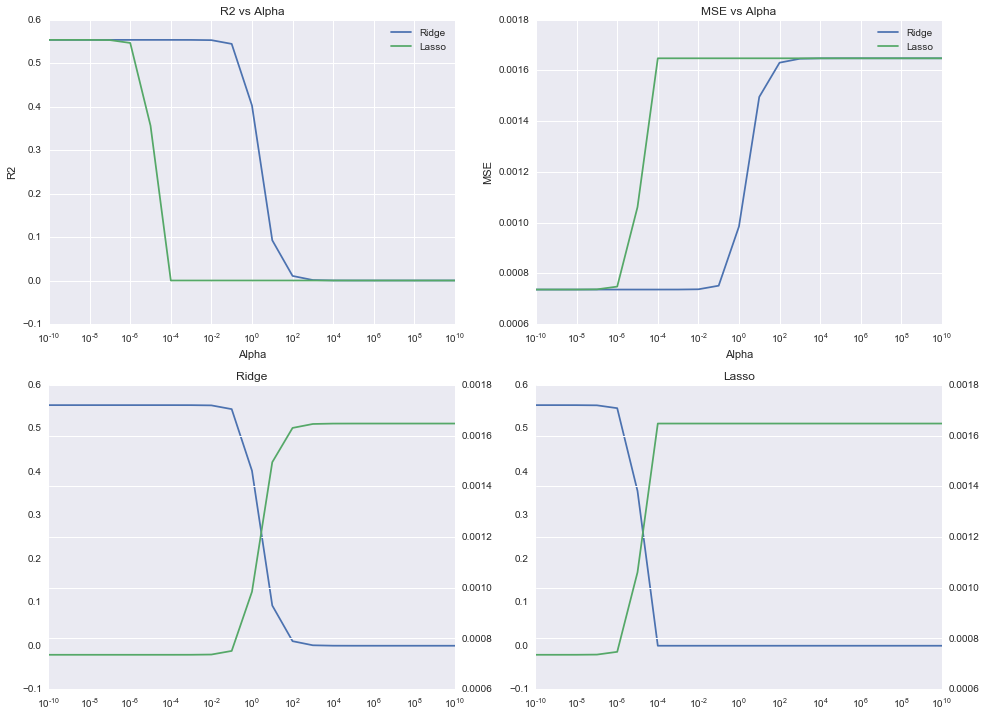

In [159]:
%matplotlib inline
fig=plt.figure(figsize=(16,12))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
out_df.Ridge_R2.plot(ax=ax1,label='Ridge')
out_df.Ridge_MSE.plot(ax=ax2,label='Ridge')
out_df.Lasso_R2.plot(ax=ax1,label='Lasso')
out_df.Lasso_MSE.plot(ax=ax2,label='Lasso')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.legend()
ax2.legend()
ax1.set_title('R2 vs Alpha')
ax2.set_title('MSE vs Alpha')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('R2')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('MSE')
ax3=fig.add_subplot(223)
out_df.Ridge_R2.plot(ax=ax3,label='Ridge')
out_df.Ridge_MSE.plot(secondary_y=True,ax=ax3,label='Ridge')
ax3.set_xscale('log')
ax4=fig.add_subplot(224)
out_df.Lasso_R2.plot(ax=ax4,label='Lasso')
out_df.Lasso_MSE.plot(secondary_y=True,ax=ax4,label='Lasso')
ax4.set_xscale('log')
ax3.set_title('Ridge')
ax4.set_title('Lasso')

In [160]:
logreg = LogisticRegression(C=2)
print logreg
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [161]:
confusion_matrix(y_test, pred)

array([[56859,     9],
       [   30,    64]])

In [162]:
logreg = LogisticRegression(penalty='l1', C=0.1)
print logreg
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [163]:
confusion_matrix(y_test, pred)

array([[56859,     9],
       [   30,    64]])

In [164]:
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier()
clf.fit(X_train, y_train)
gradPred = clf.predict(X_test)

In [165]:
gradPred = clf.predict(X_test)

In [166]:
confusion_matrix(y_test, gradPred)

array([[56860,     8],
       [   71,    23]])

In [107]:
from sklearn.grid_search import GridSearchCV  
param_test1 = {'n_estimators':range(10,20,2)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=50,
              min_samples_split=500, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [10, 12, 14, 16, 18]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [108]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.74318, std: 0.13786, params: {'n_estimators': 10},
  mean: 0.77025, std: 0.07708, params: {'n_estimators': 12},
  mean: 0.77621, std: 0.06780, params: {'n_estimators': 14},
  mean: 0.78406, std: 0.07010, params: {'n_estimators': 16},
  mean: 0.78293, std: 0.08118, params: {'n_estimators': 18}],
 {'n_estimators': 16},
 0.7840648353758491)

In [110]:
param_test2 = {'max_depth':range(5,8,1)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=16, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.81886, std: 0.08487, params: {'max_depth': 5},
  mean: 0.71893, std: 0.16572, params: {'max_depth': 6},
  mean: 0.85464, std: 0.05919, params: {'max_depth': 7}],
 {'max_depth': 7},
 0.8546433183538502)

In [111]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=16,max_depth=7,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.69572, std: 0.16783, params: {'min_samples_split': 1000, 'min_samples_leaf': 30},
  mean: 0.76993, std: 0.10299, params: {'min_samples_split': 1200, 'min_samples_leaf': 30},
  mean: 0.75992, std: 0.09448, params: {'min_samples_split': 1400, 'min_samples_leaf': 30},
  mean: 0.71594, std: 0.14862, params: {'min_samples_split': 1600, 'min_samples_leaf': 30},
  mean: 0.78578, std: 0.07389, params: {'min_samples_split': 1800, 'min_samples_leaf': 30},
  mean: 0.78566, std: 0.07370, params: {'min_samples_split': 2000, 'min_samples_leaf': 30},
  mean: 0.63264, std: 0.13896, params: {'min_samples_split': 1000, 'min_samples_leaf': 40},
  mean: 0.74313, std: 0.11977, params: {'min_samples_split': 1200, 'min_samples_leaf': 40},
  mean: 0.74304, std: 0.11980, params: {'min_samples_split': 1400, 'min_samples_leaf': 40},
  mean: 0.73331, std: 0.09253, params: {'min_samples_split': 1600, 'min_samples_leaf': 40},
  mean: 0.70510, std: 0.09822, params: {'min_samples_split': 1800, 'min_samples_

In [113]:
param_test4 = {'max_features':range(5,12,1)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=16,max_depth=7, min_samples_split=1800, min_samples_leaf=60, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.85107, std: 0.08693, params: {'max_features': 5},
  mean: 0.69881, std: 0.15062, params: {'max_features': 6},
  mean: 0.55777, std: 0.25661, params: {'max_features': 7},
  mean: 0.68205, std: 0.22199, params: {'max_features': 8},
  mean: 0.68613, std: 0.20786, params: {'max_features': 9},
  mean: 0.61325, std: 0.18640, params: {'max_features': 10},
  mean: 0.67581, std: 0.19788, params: {'max_features': 11}],
 {'max_features': 5},
 0.8510666876833237)

In [115]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=16,max_depth=7,min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10,max_features=5),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.56183, std: 0.13153, params: {'subsample': 0.6},
  mean: 0.84501, std: 0.09549, params: {'subsample': 0.7},
  mean: 0.80260, std: 0.11524, params: {'subsample': 0.75},
  mean: 0.73889, std: 0.21334, params: {'subsample': 0.8},
  mean: 0.66671, std: 0.19645, params: {'subsample': 0.85},
  mean: 0.67090, std: 0.14579, params: {'subsample': 0.9}],
 {'subsample': 0.7},
 0.8450123013250781)

In [121]:
param_test6 = {'learning_rate': [0.01,0.005]}
gsearch6 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=16,max_depth=7,min_samples_split=1200, min_samples_leaf=60, subsample=0.7, random_state=10,max_features=5),
param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train,y_train)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.96791, std: 0.01346, params: {'learning_rate': 0.01},
  mean: 0.96786, std: 0.01243, params: {'learning_rate': 0.005}],
 {'learning_rate': 0.01},
 0.9679105372097767)

In [126]:
gb_clf = ensemble.GradientBoostingClassifier(learning_rate=0.01, n_estimators=16,max_depth=7,min_samples_split=1200, min_samples_leaf=60, subsample=0.7, random_state=10,max_features=5)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
confusion_matrix(y_test, gb_pred)

array([[56868,     0],
       [   94,     0]])

In [172]:
gb_clf = ensemble.GradientBoostingClassifier(learning_rate=0.01)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
confusion_matrix(y_test, gb_pred)

array([[56868,     0],
       [   24,    70]])

In [130]:
gb_clf = ensemble.GradientBoostingClassifier(learning_rate=0.01,max_depth=7)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
confusion_matrix(y_test, gb_pred)

array([[56866,     2],
       [   24,    70]])

In [167]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
confusion_matrix(y_test,rf_pred)

array([[56867,     1],
       [   17,    77]])

In [168]:
rf_clf.feature_importances_

array([ 0.01518768,  0.0123688 ,  0.01838437,  0.03438155,  0.01088924,
        0.01325352,  0.03026812,  0.01170997,  0.03774827,  0.08781731,
        0.07247471,  0.10240731,  0.0110417 ,  0.1244184 ,  0.01133774,
        0.07912473,  0.15397476,  0.0268238 ,  0.01167377,  0.01190169,
        0.01500186,  0.00964891,  0.00826253,  0.00954824,  0.00954311,
        0.01678025,  0.01191461,  0.01347933,  0.00840083,  0.0017455 ,
        0.00660856,  0.01187884])

In [169]:
f1_score(y_test,rf_pred)

0.89534883720930247

In [170]:
recall_score(y_test,rf_pred)

0.81914893617021278

In [171]:
precision_score(y_test,rf_pred)

0.98717948717948723